# Algebra lineare {#sec-linear-algebra}

**Prerequisiti**

**Concetti e competenze chiave**

**Preparazione del Notebook**

In [11]:
# Importazioni dalla libreria standard
import os

# Importazioni di librerie di terze parti
import numpy as np
import pandas as pd
import seaborn as sns
import arviz as az
import scipy.stats as stats
from cmdstanpy import CmdStanModel
import statsmodels.api as sm
import pingouin as pg

# Configurazione
seed = sum(map(ord, "linear_algebra"))  # Genera un seme basato sulla somma dei valori ASCII della stringa "linear_algebra"
rng = np.random.default_rng(seed=seed)  # Crea un generatore di numeri casuali con il seme specificato
sns.set_theme(palette="colorblind")  # Imposta il tema di Seaborn per grafici accessibili ai daltonici
az.style.use("arviz-darkgrid")  # Imposta lo stile dei grafici di ArviZ
%config InlineBackend.figure_format = "retina"  # Migliora la risoluzione dei grafici inline

# Definizione delle directory
home_directory = os.path.expanduser("~")  # Ottiene la directory home dell'utente
project_directory = f"{home_directory}/_repositories/psicometria"  # Definisce la directory del progetto

# Stampa la directory del progetto per verificarla
print(f"Directory del progetto: {project_directory}")

Directory del progetto: /Users/corradocaudek/_repositories/psicometria


## Introduzione 

Questo capitolo presenta i fondamenti dell'algebra lineare, una branca della matematica essenziale per la comprensione e l'analisi dei modelli di regressione lineare. 

## Rappresentazione dei Vettori

Nell'algebra lineare, un vettore, che rappresenta una lista ordinata di scalari, è solitamente indicato con una lettera minuscola in grassetto, come $\mathbf{v}$. Gli elementi di un vettore sono generalmente indicati con un indice, ad esempio $\mathbf{v}_1$ si riferisce al primo elemento del vettore $\mathbf{v}$.

Un vettore $\mathbf{v}$ di $n$ elementi può essere rappresentato sia come una colonna che come una riga, a seconda della convenzione scelta. Ad esempio, un vettore colonna di $n$ elementi è scritto come:

$$
\mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix},
$$

mentre un vettore riga appare come:

$$
\mathbf{v} = \begin{bmatrix} v_1 & v_2 & \cdots & v_n \end{bmatrix}.
$$

Questa notazione consente di visualizzare chiaramente i singoli elementi del vettore e di riferirsi a ciascuno di essi in modo specifico.

Una lista di $n$ scalari organizzata in un vettore $\mathbf{v}$ è chiamata "dimensione" del vettore. Formalmente, si esprime come $\mathbf{v} \in \mathbb{R}^n$, indicando che il vettore $\mathbf{v}$ appartiene all'insieme di tutti i vettori reali di dimensione $n$.


## Visualizzazione Geometrica dei Vettori

I vettori possono essere rappresentati come frecce in uno spazio $n$-dimensionale, con l'origine come punto di partenza e la punta della freccia che corrisponde alle coordinate specificate dal vettore. La norma $L_2$ (o lunghezza) di un vettore, denotata come $\|\mathbf{v}\|$, rappresenta la distanza euclidea dall'origine alla punta del vettore.

Per un vettore $\mathbf{v} = [v_1, v_2, \ldots, v_n]$, la norma è definita come:

$$
\|\mathbf{v}\| = \sqrt{v_1^2 + v_2^2 + \cdots + v_n^2}.
$$

### Esempio Numerico

Consideriamo un vettore in uno spazio bidimensionale, ad esempio $\mathbf{v} = [3, 4]$. Geometricamente, questo vettore parte dall'origine $(0, 0)$ e termina nel punto $(3, 4)$ del piano cartesiano.

Per calcolare la norma $L_2$ di questo vettore, applichiamo la formula:

$$
\|\mathbf{v}\| = \sqrt{3^2 + 4^2} = \sqrt{9 + 16} = \sqrt{25} = 5.
$$

Quindi, la norma del vettore $\mathbf{v} = [3, 4]$ è 5, che rappresenta la lunghezza della freccia dal punto di origine $(0, 0)$ al punto $(3, 4)$ nello spazio bidimensionale.

### Rappresentazione Geometrica

```
y
^
|       * (3, 4)
|      /
|     /
|    /
|   /
|  /
| / 
|/____________> x
(0, 0)
```

In questo diagramma, il punto `*` rappresenta la fine del vettore $\mathbf{v}$ e la linea inclinata mostra il vettore stesso che parte dall'origine. L'altezza della linea fino al punto `(3, 4)` rappresenta visivamente la norma del vettore, che è la distanza di 5 unità dall'origine.

Questo esempio illustra chiaramente la relazione tra la rappresentazione numerica di un vettore e la sua interpretazione geometrica, facilitando la comprensione della lunghezza del vettore e della sua direzione nello spazio bidimensionale.

Sebbene noi siamo principalmente limitati a ragionare su spazi bidimensionali (2D) e tridimensionali (3D), i dati che raccogliamo spesso risiedono in spazi di dimensioni superiori. L'algebra lineare permette di ragionare e sviluppare intuizioni su vettori e spazi di dimensioni molto più elevate, superando i limiti della visualizzazione diretta.

## Operazioni di Base sui Vettori

### 1. Moltiplicazione di un Vettore per uno Scalare

La moltiplicazione di un vettore per uno scalare produce un nuovo vettore. Questa operazione può essere interpretata come una "scalatura" del vettore nello spazio: il vettore risultante mantiene la stessa direzione dell'originale, ma la sua lunghezza viene modificata in base allo scalare.

Se $\mathbf{v} = [v_1, v_2, \ldots, v_n]$ è un vettore e $c$ è uno scalare, la moltiplicazione del vettore per lo scalare è data da:

$$
c\mathbf{v} = [cv_1, cv_2, \ldots, cv_n]
$$

### 2. Addizione di Vettori

È possibile sommare due vettori della stessa dimensione. La somma vettoriale si ottiene sommando gli elementi corrispondenti di ciascun vettore.

Se $\mathbf{u} = [u_1, u_2, \ldots, u_n]$ e $\mathbf{v} = [v_1, v_2, \ldots, v_n]$ sono due vettori di dimensione $n$, la loro somma è:

$$
\mathbf{u} + \mathbf{v} = [u_1 + v_1, u_2 + v_2, \ldots, u_n + v_n]
$$

### 3. Prodotto Scalare (o Prodotto Interno)

Il prodotto scalare tra due vettori della stessa dimensione è uno scalare che fornisce informazioni sull'angolo tra i vettori nello spazio. Formalmente, il prodotto scalare di $\mathbf{u} = [u_1, u_2, \ldots, u_n]$ e $\mathbf{v} = [v_1, v_2, \ldots, v_n]$ è definito come:

$$
\mathbf{u} \cdot \mathbf{v} = u_1v_1 + u_2v_2 + \cdots + u_nv_n
$$

Questo prodotto scalare può anche essere espresso in termini dell'angolo $\theta$ tra i vettori:

$$
\mathbf{u} \cdot \mathbf{v} = \|\mathbf{u}\| \|\mathbf{v}\| \cos(\theta)
$$

Se due vettori sono ortogonali, ovvero formano un angolo di $90^\circ$ tra loro, il loro prodotto scalare è zero: $\mathbf{u} \cdot \mathbf{v} = 0$.

### 4. Prodotto Scalare di un Vettore con Se Stesso

Il prodotto scalare di un vettore con se stesso fornisce il quadrato della sua lunghezza. Se $\mathbf{v} = [v_1, v_2, \ldots, v_n]$, allora:

$$
\mathbf{v} \cdot \mathbf{v} = v_1^2 + v_2^2 + \cdots + v_n^2 = \|\mathbf{v}\|^2
$$

Queste operazioni di base sui vettori sono fondamentali per molte applicazioni in matematica, fisica, informatica e altre scienze, fornendo una struttura potente per analizzare e risolvere problemi in spazi multidimensionali.

## Matrici

Una matrice è una struttura matematica bidimensionale costituita da elementi disposti in righe e colonne. Formalmente, una matrice $\mathbf{A}$ di dimensioni $m \times n$ (si legge "m per n") è un array rettangolare di numeri reali o complessi, denotato come:

$$ \mathbf{A} = (a_{ij})_{m \times n} = \begin{bmatrix} 
a_{11} & a_{12} & \cdots & a_{1n} \\ 
a_{21} & a_{22} & \cdots & a_{2n} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix} $$

dove $a_{ij}$ rappresenta l'elemento nella $i$-esima riga e $j$-esima colonna della matrice.

Le matrici sono comunemente indicate con lettere maiuscole in grassetto, come $\mathbf{A}$, $\mathbf{B}$, $\mathbf{C}$, etc. Una matrice con $m$ righe e $n$ colonne si dice di ordine $m \times n$.

In molte matrici di dati, ogni elemento $a_{ij}$ è uno scalare che rappresenta il valore della $j$-esima variabile del $i$-esimo campione. Formalmente, possiamo indicare $\mathbf{A} \in \mathbb{R}^{m \times n}$, il che significa che la matrice $\mathbf{A}$ ha $m$ righe e $n$ colonne. Si dice comunemente che la "dimensione" di $\mathbf{A}$ è $m \times n$.

### Matrici come Collezioni di Vettori Colonna

Le matrici possono essere interpretate come collezioni di vettori colonna. Ad esempio, una matrice di dati può essere rappresentata come:

$$
\mathbf{A} = \begin{bmatrix} \mathbf{a}_1 & \mathbf{a}_2 & \cdots & \mathbf{a}_n \end{bmatrix}
$$

In questo caso, $\mathbf{A}$ è composta da una sequenza di $n$ vettori colonna $\mathbf{a}_1, \mathbf{a}_2, \ldots, \mathbf{a}_n$, ciascuno dei quali è un vettore di dimensione $m$. Più precisamente, ogni vettore colonna $\mathbf{a}_j$ rappresenta i dati di tutti i campioni per la $j$-esima variabile o feature.

### Matrici come Collezioni di Vettori Riga

In alternativa, una matrice può essere vista come una collezione di vettori riga. In questo contesto, ogni riga di $\mathbf{A}$ rappresenta tutte le variabili misurate per un dato campione:

$$
\mathbf{A} = \begin{bmatrix} 
\mathbf{a}_1^T \\ 
\mathbf{a}_2^T \\ 
\vdots \\ 
\mathbf{a}_m^T 
\end{bmatrix}
$$

Qui, la matrice $\mathbf{A}$ è composta da $m$ vettori riga, denotati come $\mathbf{a}_i^T$. Ognuno di questi vettori riga $\mathbf{a}_i^T$ è di dimensione $n$, indicando che ciascun campione ha $n$ variabili o feature associate. 

### Trasposta di una Matrice

Il simbolo $T$ rappresenta la trasposta di una matrice. La trasposta di una matrice, denotata con un apice $T$ (es. $\mathbf{A}^T$), è un'operazione che trasforma ciascuna delle righe di $\mathbf{A}$ in colonne di $\mathbf{A}^T$. In altre parole, se $\mathbf{A}$ ha dimensione $m \times n$, allora $\mathbf{A}^T$ avrà dimensione $n \times m$:

$$
\mathbf{A}^T = \begin{bmatrix} 
a_{11} & a_{21} & \cdots & a_{m1} \\ 
a_{12} & a_{22} & \cdots & a_{m2} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
a_{1n} & a_{2n} & \cdots & a_{mn} 
\end{bmatrix}
$$

Con la trasposta, le variabili misurate diventano colonne e i campioni diventano righe. Essenzialmente, i vettori riga sono le trasposte dei vettori colonna. Questo concetto è molto utile in algebra lineare, poiché permette di passare facilmente da una rappresentazione dei dati a un'altra.

In [6]:
# Definizione di vettori (array 1D)
x = np.array([0, 1, 2, 3])
y = np.array([1, 2, 3, 4])

# Un po' confusionario: i vettori (array 1D) in numpy vengono stampati orizzontalmente
print("x è:\t", x)
print("y è:\t", y)
print("Forma di x:", x.shape)
print("---------")

# Operazioni
print("5x = \t", 5 * x)
print("x + y =\t", x + y)
print("x * y =\t", x.dot(y))
print("---------")

# Definizione di una matrice (array 2D)
n, p = 5, 3  # 5 campioni, 3 dimensioni
X = np.random.randint(10, size=(n, p))  # matrice di interi casuali
print("X ha l'aspetto:\n", X)
print("La forma di X è: ", X.shape)
print("---------")

# Trasposta
print("Trasposta di X:\n", X.T)  # Sintassi numpy per la trasposta
print("Forma della trasposta di X: ", X.T.shape)

x è:	 [0 1 2 3]
y è:	 [1 2 3 4]
Forma di x: (4,)
---------
5x = 	 [ 0  5 10 15]
x + y =	 [1 3 5 7]
x * y =	 20
---------
X ha l'aspetto:
 [[4 6 3]
 [8 4 0]
 [4 1 7]
 [5 8 0]
 [6 3 9]]
La forma di X è:  (5, 3)
---------
Trasposta di X:
 [[4 8 4 5 6]
 [6 4 1 8 3]
 [3 0 7 0 9]]
Forma della trasposta di X:  (3, 5)


## Moltiplicazione Matrice-Vettore

La moltiplicazione di una matrice per un vettore è un'operazione fondamentale nell'algebra lineare che produce un nuovo vettore. Affinché questa operazione sia possibile, il numero di colonne della matrice deve essere uguale alla dimensione del vettore di input, garantendo così la compatibilità dimensionale necessaria.

### Due Modi di Comprendere la Moltiplicazione Matrice-Vettore

Esistono due modi equivalenti per comprendere e descrivere la moltiplicazione matrice-vettore. È importante notare che queste prospettive non rappresentano operazioni diverse, ma sono semplicemente modi alternativi di interpretare la stessa operazione. In altre parole, entrambe le interpretazioni producono lo stesso risultato finale.

#### 1. Combinazione Lineare dei Vettori Colonna

In questa interpretazione, consideriamo la matrice come una collezione di vettori colonna. La moltiplicazione matrice-vettore viene vista come la creazione di un nuovo vettore tramite una combinazione lineare dei vettori colonna della matrice, utilizzando gli elementi del vettore di input come coefficienti per la combinazione.

Se $\mathbf{A}$ è una matrice $m \times n$ e $\mathbf{x}$ è un vettore di dimensione $n$, il prodotto $\mathbf{A} \mathbf{x}$ può essere rappresentato come:

$$
\mathbf{A} \mathbf{x} = x_1 \mathbf{a}_1 + x_2 \mathbf{a}_2 + \cdots + x_n \mathbf{a}_n
$$

dove $\mathbf{a}_1, \mathbf{a}_2, \ldots, \mathbf{a}_n$ sono i vettori colonna di $\mathbf{A}$, e $x_1, x_2, \ldots, x_n$ sono gli elementi del vettore $\mathbf{x}$. In questa interpretazione, il vettore risultante è ottenuto combinando linearmente i vettori colonna della matrice, pesati dagli elementi corrispondenti del vettore di input.

#### 2. Prodotto Scalare con i Vettori Riga

Un'alternativa per comprendere la moltiplicazione matrice-vettore è considerare la matrice come una collezione di vettori riga. In questa prospettiva, ogni elemento del vettore risultante è calcolato come il prodotto scalare tra un vettore riga della matrice e il vettore di input.

Se $\mathbf{a}_i^T$ denota la $i$-esima riga della matrice $\mathbf{A}$, allora l'$i$-esimo elemento del prodotto $\mathbf{A} \mathbf{x}$ è dato da:

$$
(\mathbf{A} \mathbf{x})_i = \mathbf{a}_i^T \cdot \mathbf{x} \quad \text{per} \quad i = 1, 2, \ldots, m
$$

dove $(\mathbf{A} \mathbf{x})_i$ è l'$i$-esimo elemento del vettore risultante. In questo modo, ogni elemento del vettore di output è il risultato del prodotto scalare tra una riga della matrice e il vettore di input.

### Sintesi delle Interpretazioni

Le due prospettive presentate sono solo modi differenti di descrivere lo stesso processo matematico di moltiplicazione matrice-vettore. Indipendentemente dall'interpretazione scelta, il risultato finale è identico: un vettore di dimensione $m$ risultante dalla combinazione lineare dei vettori colonna (prima prospettiva) o dalla somma dei prodotti scalari tra le righe della matrice e il vettore di input (seconda prospettiva).

### Esempio di Moltiplicazione Matrice-Vettore

Consideriamo una matrice $\mathbf{A}$ di dimensione $m \times n$ e un vettore $\mathbf{x}$ di dimensione $n$:

$$
\mathbf{A} = \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix}, \quad \mathbf{x} = \begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}
$$

Il risultato della moltiplicazione $\mathbf{y} = \mathbf{A} \mathbf{x}$ è un vettore $\mathbf{y}$ di dimensione $m$:

$$
\mathbf{y} = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix}
$$

#### Prospettiva 1: Combinazione Lineare delle Colonne

Secondo la prima prospettiva, la moltiplicazione matrice-vettore può essere vista come una combinazione lineare delle colonne di $\mathbf{A}$, ciascuna ponderata dagli elementi di $\mathbf{x}$:

$$
\mathbf{y} = x_1 \mathbf{a}_1 + x_2 \mathbf{a}_2 + \cdots + x_n \mathbf{a}_n
$$

#### Prospettiva 2: Prodotto Scalare delle Righe

Secondo la seconda prospettiva, ciascun elemento di $\mathbf{y}$ è calcolato come il prodotto scalare delle righe di $\mathbf{A}$ con il vettore $\mathbf{x}$:

$$
y_i = \mathbf{a}_i^T \mathbf{x} = a_{i1}x_1 + a_{i2}x_2 + \cdots + a_{in}x_n, \quad \text{per } i = 1, 2, \ldots, m
$$

### Formula Generale

In conclusione, la moltiplicazione di una matrice $m \times n$ per un vettore di dimensione $n$ può essere espressa come:

$$
\mathbf{y} = \mathbf{A} \mathbf{x} = \begin{bmatrix}
a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n \\
a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n \\
\vdots \\
a_{m1}x_1 + a_{m2}x_2 + \cdots + a_{mn}x_n
\end{bmatrix}
$$

Il risultato sarà sempre un vettore di dimensione $m$, indipendentemente dalla prospettiva utilizzata per comprendere l'operazione.

### Prodotto Matrice-Vettore come Prodotto Scalare

I vettori e le operazioni su di essi possono essere interpretati come operazioni su matrici a una dimensione. Consideriamo un vettore riga $\mathbf{u}$ e un vettore colonna $\mathbf{v}$, entrambi di dimensione $n$. 

Se trattiamo il vettore riga $\mathbf{u}$ come una matrice di dimensioni $1 \times n$ e il vettore colonna $\mathbf{v}$ come una matrice di dimensioni $n \times 1$, il prodotto matrice-vettore $\mathbf{u} \mathbf{v}$ diventa una matrice di dimensioni $1 \times 1$, che corrisponde a uno scalare. Questo prodotto è noto anche come **prodotto scalare** (o prodotto interno) tra i due vettori:

$$
\mathbf{u} \cdot \mathbf{v} = u_1 v_1 + u_2 v_2 + \cdots + u_n v_n
$$

Espandendo questa operazione, si può vedere come essa rappresenti la somma dei prodotti degli elementi corrispondenti di $\mathbf{u}$ e $\mathbf{v}$:

$$
\mathbf{u} \mathbf{v} = \begin{bmatrix} u_1 & u_2 & \cdots & u_n \end{bmatrix} \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix} = u_1v_1 + u_2v_2 + \cdots + u_nv_n
$$

### Prodotto Esterno

Passiamo ora al **prodotto esterno**, spesso denotato come $\mathbf{u} \mathbf{v}^T$. 

Se $\mathbf{u}$ è un vettore colonna di dimensione $n \times 1$ e $\mathbf{v}^T$ è un vettore riga di dimensione $1 \times n$, il loro prodotto esterno risulterà in una matrice di dimensioni $n \times n$. Questo prodotto si ottiene moltiplicando ogni elemento di $\mathbf{u}$ per ciascun elemento di $\mathbf{v}^T$:

$$
\mathbf{u} \mathbf{v}^T = \begin{bmatrix} u_1 \\ u_2 \\ \vdots \\ u_n \end{bmatrix} \begin{bmatrix} v_1 & v_2 & \cdots & v_n \end{bmatrix} = \begin{bmatrix}
u_1 v_1 & u_1 v_2 & \cdots & u_1 v_n \\
u_2 v_1 & u_2 v_2 & \cdots & u_2 v_n \\
\vdots & \vdots & \ddots & \vdots \\
u_n v_1 & u_n v_2 & \cdots & u_n v_n
\end{bmatrix}
$$

### Interpretazione del Prodotto Esterno

Il prodotto esterno $\mathbf{u} \mathbf{v}^T$ produce una matrice in cui ogni elemento è il prodotto di un elemento di $\mathbf{u}$ con un elemento di $\mathbf{v}$. Questo processo crea una struttura bidimensionale che espande le informazioni contenute nei vettori originali.

Questa operazione trova applicazione in molti contesti, come nella rappresentazione di matrici di covarianza, nei calcoli delle reti neurali e in diverse altre aree dell'algebra lineare e della statistica. In questo senso, il prodotto esterno permette di costruire una matrice a partire da due vettori, catturando tutte le combinazioni possibili di prodotti tra gli elementi dei vettori.

### Moltiplicazione Matrice-Matrice

La moltiplicazione di due matrici $\mathbf{A}$ e $\mathbf{B}$ per ottenere una matrice $\mathbf{C}$ può essere vista come una serie di moltiplicazioni matrice-vettore. In altre parole, $\mathbf{B}$ può essere considerata come una collezione di vettori colonna $\mathbf{b}_1, \mathbf{b}_2, \ldots, \mathbf{b}_p$. La moltiplicazione matrice-matrice consiste nel calcolare ciascuna colonna della matrice risultante $\mathbf{C}$ moltiplicando $\mathbf{A}$ per ogni vettore colonna di $\mathbf{B}$.

Se $\mathbf{A}$ è una matrice di dimensioni $m \times n$ e $\mathbf{B}$ è una matrice di dimensioni $n \times p$, il prodotto $\mathbf{C} = \mathbf{A} \mathbf{B}$ sarà una matrice di dimensioni $m \times p$. Ogni colonna $\mathbf{c}_j$ di $\mathbf{C}$ è ottenuta come prodotto della matrice $\mathbf{A}$ con il vettore colonna $\mathbf{b}_j$ di $\mathbf{B}$:

$$
\mathbf{C} = \mathbf{A} \mathbf{B} = \begin{bmatrix} \mathbf{A} \mathbf{b}_1 & \mathbf{A} \mathbf{b}_2 & \cdots & \mathbf{A} \mathbf{b}_p \end{bmatrix}
$$

### Definizione Formale della Moltiplicazione Matrice-Matrice

Il prodotto tra le matrici $\mathbf{A} = [a_{ij}]$ di dimensioni $m \times n$ e $\mathbf{B} = [b_{jk}]$ di dimensioni $n \times p$ genera una matrice $\mathbf{C} = [c_{ik}]$ di dimensioni $m \times p$, i cui elementi sono ottenuti dalla somma dei prodotti degli elementi corrispondenti delle righe di $\mathbf{A}$ e delle colonne di $\mathbf{B}$:

$$
c_{ik} = \sum_{j=1}^{n} a_{ij} b_{jk}
$$

Ciò significa che l'elemento $c_{ik}$ della matrice risultante $\mathbf{C}$ è il prodotto scalare della $i$-esima riga di $\mathbf{A}$ con la $k$-esima colonna di $\mathbf{B}$.

### Regola delle Dimensioni Interne

Perché la moltiplicazione matrice-matrice sia definita, le cosiddette **dimensioni interne** delle matrici devono coincidere. In altre parole, il numero di colonne della prima matrice ($\mathbf{A}$) deve essere uguale al numero di righe della seconda matrice ($\mathbf{B}$). Se $\mathbf{A}$ ha dimensioni $m \times n$ e $\mathbf{B}$ ha dimensioni $n \times p$, allora il prodotto $\mathbf{A} \mathbf{B}$ è definito e il risultato sarà una matrice di dimensioni $m \times p$.

### Non Commutatività della Moltiplicazione Matrice-Matrice

È importante notare che la moltiplicazione tra matrici **non è commutativa**. Questo significa che generalmente $\mathbf{A} \mathbf{B} \neq \mathbf{B} \mathbf{A}$. Inoltre, se $\mathbf{A}$ ha dimensioni $m \times n$ e $\mathbf{B}$ ha dimensioni $n \times p$, il prodotto $\mathbf{B} \mathbf{A}$ non è nemmeno definito, a meno che $m = p$. 

Anche quando entrambe le moltiplicazioni sono definite (cioè, quando le dimensioni delle matrici coincidono in modo appropriato), i risultati di $\mathbf{A} \mathbf{B}$ e $\mathbf{B} \mathbf{A}$ sono generalmente diversi. Questo evidenzia che moltiplicare una matrice da sinistra è fondamentalmente diverso dal moltiplicarla da destra, poiché la disposizione dei vettori riga e colonna e il modo in cui vengono combinati differiscono.

### Esempio di Moltiplicazione Matrice-Matrice

Consideriamo le seguenti matrici:

$$
\mathbf{A} = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}, \quad \mathbf{B} = \begin{bmatrix}
7 & 8 \\
9 & 10 \\
11 & 12
\end{bmatrix}
$$

$\mathbf{A}$ è una matrice $2 \times 3$ e $\mathbf{B}$ è una matrice $3 \times 2$. Il prodotto $\mathbf{A} \mathbf{B}$ sarà una matrice $2 \times 2$:

$$
\mathbf{C} = \mathbf{A} \mathbf{B} = \begin{bmatrix}
(1 \cdot 7 + 2 \cdot 9 + 3 \cdot 11) & (1 \cdot 8 + 2 \cdot 10 + 3 \cdot 12) \\
(4 \cdot 7 + 5 \cdot 9 + 6 \cdot 11) &

 (4 \cdot 8 + 5 \cdot 10 + 6 \cdot 12)
\end{bmatrix} = \begin{bmatrix}
58 & 64 \\
139 & 154
\end{bmatrix}
$$

Ogni elemento di $\mathbf{C}$ è calcolato come prodotto scalare delle righe di $\mathbf{A}$ con le colonne di $\mathbf{B}$, illustrando chiaramente il concetto di moltiplicazione matrice-matrice e la regola delle dimensioni interne.

### Matrice Identità e Matrice Inversa 

### Matrice Identità

La matrice identità, denotata come $\mathbf{I}_n$, è una matrice quadrata di dimensione $n \times n$ con tutti gli elementi sulla diagonale principale uguali a 1 e tutti gli altri elementi uguali a 0. Ad esempio, una matrice identità 3x3 è:

$$
\mathbf{I}_3 = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

In generale, una matrice identità di dimensione $n \times n$ è:

$$
\mathbf{I}_n = \begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{bmatrix}
$$

La matrice identità ha la proprietà fondamentale di essere l'elemento neutro per la moltiplicazione matriciale. Per qualsiasi matrice $\mathbf{A}$ di dimensioni $n \times n$:

$$
\mathbf{A} \mathbf{I}_n = \mathbf{A} \quad \text{e} \quad \mathbf{I}_n \mathbf{A} = \mathbf{A}
$$

### Determinante di una Matrice

Il determinante è una funzione scalare delle matrici quadrate che fornisce importanti informazioni sulle proprietà della matrice. Per una matrice 2x2:

$$
\mathbf{A} = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
$$

Il determinante è calcolato come:

$$
\det(\mathbf{A}) = ad - bc
$$

Per matrici di dimensioni maggiori, il calcolo del determinante diventa più complesso e coinvolge l'espansione di Laplace o altri metodi.

### Inverso di una Matrice

L'inverso di una matrice $\mathbf{A}$, denotato come $\mathbf{A}^{-1}$, esiste solo per matrici quadrate non singolari (cioè, con determinante non nullo). L'inverso è definito dalla proprietà:

$$
\mathbf{A} \mathbf{A}^{-1} = \mathbf{I}_n \quad \text{e} \quad \mathbf{A}^{-1} \mathbf{A} = \mathbf{I}_n
$$

#### Esempio: Calcolo dell'Inversa di una Matrice 2x2

Per una matrice 2x2:

$$
\mathbf{A} = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
$$

L'inversa, se esiste, è data da:

$$
\mathbf{A}^{-1} = \frac{1}{ad-bc} \begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}
$$

dove $ad-bc$ è il determinante di $\mathbf{A}$. L'inversa esiste solo se questo determinante è diverso da zero.

### Utilizzo dell'Inverso di una Matrice

L'inverso di una matrice è particolarmente utile nella risoluzione di sistemi di equazioni lineari. Data un'equazione matriciale $\mathbf{A}\mathbf{x} = \mathbf{b}$, possiamo isolare $\mathbf{x}$ moltiplicando entrambi i lati per $\mathbf{A}^{-1}$:

$$
\mathbf{A}^{-1}\mathbf{A}\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}
$$

$$
\mathbf{I}\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}
$$

$$
\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}
$$

Questa proprietà è fondamentale nella derivazione della formula per i coefficienti della regressione lineare.

In [7]:
# Matrice-Vettore
n, p = 2, 3  # 2 righe, 3 colonne
A = np.arange(n * p).reshape(
    (n, p)
)  # modo veloce per ottenere un array 2D con interi ordinati
b = np.arange(p)  # i vettori non hanno una seconda dimensione in numpy
c = A @ b  # sintassi per la moltiplicazione matrice-vettore in numpy

print("A:\n", A)
print("------")
print("b:\n", b)  # b è un vettore colonna, nonostante come viene stampato
print("------")
print("c:\n", c)  # lo stesso vale per c

A:
 [[0 1 2]
 [3 4 5]]
------
b:
 [0 1 2]
------
c:
 [ 5 14]


In [8]:
# Proviamo a moltiplicare A con un vettore a 4 dimensioni per divertimento
x = np.arange(4)
c = A.dot(x)  # un'altra sintassi per la moltiplicazione matrice-vettore in numpy

# Nota: ci aspettiamo un errore qui, perché A ha 3 colonne ma x ha 4 elementi

ValueError: shapes (2,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

In [9]:
# Moltiplicazione Matrice-Matrice
n, p, k = 5, 3, 2  # Definizione delle dimensioni: A è 5x3, B è 3x2
A = np.arange(n * p).reshape(
    (n, p)
)  # Crea una matrice A di dimensione 5x3 con valori ordinati da 0 a 14
B = np.arange(p * k).reshape(
    (p, k)
)  # Crea una matrice B di dimensione 3x2 con valori ordinati da 0 a 5
C = A @ B  # Moltiplicazione matrice-matrice tra A e B

print("Forma di A:", A.shape, "\n", A)
print("------")
print("Forma di B:", B.shape, "\n", B)
print("------")
print("Forma di C:", C.shape, "\n", C)  # La matrice risultante C avrà dimensioni 5x2
print("------")

# Estraiamo la prima colonna di C:
b_1 = B[:, 0]  # Prima colonna di B
c_1 = A.dot(b_1)  # Moltiplicazione matrice-vettore per ottenere la prima colonna di C
print(
    "c_1:\n", c_1
)  # Risultato della moltiplicazione, corrisponde alla prima colonna di C

Forma di A: (5, 3) 
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
------
Forma di B: (3, 2) 
 [[0 1]
 [2 3]
 [4 5]]
------
Forma di C: (5, 2) 
 [[ 10  13]
 [ 28  40]
 [ 46  67]
 [ 64  94]
 [ 82 121]]
------
c_1:
 [10 28 46 64 82]


## Regressione Lineare e Stima dei Coefficienti

Esaminiamo ora come sia possibile rappresentare il modello della regressione lineare in termini matriciali.

### Regressione Lineare Semplice

Nella sua forma più elementare, la regressione lineare univariata è espressa dall'equazione:

$$
y = \beta_0 + \beta_1 x
$$

Dove:
- $y$ è la variabile dipendente (output)
- $\beta_0$ è l'intercetta
- $\beta_1$ è il coefficiente di regressione
- $x$ è la variabile indipendente (input)

### Regressione Lineare Multipla

Per generalizzare il modello a più variabili indipendenti, utilizziamo la seguente equazione:

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n.
$$

In notazione vettoriale, possiamo rappresentare questo modello come:

$$
\hat{y} = \mathbf{x}^T \mathbf{b},
$$

dove:

- $\mathbf{x} = \begin{bmatrix} x_0 \\ x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}$, con $x_0 = 1$ per includere l'intercetta;
- $\mathbf{b} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_n \end{bmatrix}$ è il vettore dei coefficienti.

Per $m$ osservazioni e $n$ variabili indipendenti, i dati vengono organizzati in una matrice di design $\mathbf{X}$ di dimensioni $m \times (n+1)$:

$$
\mathbf{X} = \begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1n} \\
1 & x_{21} & x_{22} & \cdots & x_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{m1} & x_{m2} & \cdots & x_{mn}
\end{bmatrix}.
$$

Qui, la prima colonna di $\mathbf{X}$ è composta da 1 per rappresentare il termine di intercetta.

Il vettore delle osservazioni $\mathbf{y}$ è di dimensioni $m \times 1$:

$$
\mathbf{y} = \begin{bmatrix} 
y_1 \\ 
y_2 \\ 
\vdots \\ 
y_m 
\end{bmatrix}.
$$

Il vettore dei coefficienti $\mathbf{b}$, spesso chiamato vettore dei parametri o dei pesi, è di dimensioni $(n+1) \times 1$ e include sia l'intercetta che i coefficienti delle variabili indipendenti:

$$
\mathbf{b} = \begin{bmatrix} 
\beta_0 \\ 
\beta_1 \\ 
\beta_2 \\ 
\vdots \\ 
\beta_n 
\end{bmatrix}.
$$

Qui:

- $\beta_0$ rappresenta l'intercetta del modello.
- $\beta_1, \beta_2, \ldots, \beta_n$ rappresentano i coefficienti associati alle variabili indipendenti $x_{1}, x_{2}, \ldots, x_{n}$.

L'equazione che descrive la relazione tra le osservazioni e le variabili indipendenti è data da:

$$
\mathbf{y} = \mathbf{Xb} + \mathbf{e},
$$

dove:

- $\mathbf{Xb}$ rappresenta il prodotto matrice-vettore, che è una combinazione lineare delle colonne della matrice di design $\mathbf{X}$ ponderata dai coefficienti $\mathbf{b}$;
- $\mathbf{e}$ è il vettore degli errori o residui, di dimensioni $m \times 1$, che rappresenta la differenza tra i valori osservati $\mathbf{y}$ e i valori previsti $\mathbf{Xb}$.

## Stima dei Coefficienti con il Metodo dei Minimi Quadrati

Per ogni osservazione $i$, definiamo l'errore come:

$$
e_i = y_i - \hat{y}_i,
$$

dove:

- $y_i$ è il valore osservato dell'output per l'osservazione $i$;
- $\hat{y}_i$ è il valore predetto dal modello per l'osservazione $i$.

L'obiettivo della regressione lineare è minimizzare la somma degli errori quadrati ($SSE$, Sum of Squared Errors) per tutte le osservazioni. Questa somma è data da:

$$
\text{SSE} = \sum_{i=1}^m e_i^2 = \sum_{i=1}^m (y_i - \hat{y}_i)^2.
$$

Utilizzando la notazione matriciale, possiamo esprimere la somma degli errori quadrati come:

$$
\text{SSE} = \mathbf{e}^T \mathbf{e} = (\mathbf{y} - \mathbf{X} \mathbf{b})^T (\mathbf{y} - \mathbf{X} \mathbf{b}).
$$

Il problema di ottimizzazione per minimizzare la somma degli errori quadrati si traduce in:

$$
\min_{\mathbf{b}} (\mathbf{y} - \mathbf{X} \mathbf{b})^T (\mathbf{y} - \mathbf{X} \mathbf{b}),
$$

dove:

- $\mathbf{b}$ è il vettore dei coefficienti da stimare.
- $\mathbf{X}$ è la matrice di design che include tutte le osservazioni delle variabili indipendenti.
- $\mathbf{y}$ è il vettore delle osservazioni della variabile dipendente.

Per trovare i coefficienti ottimali $\mathbf{b}$, calcoliamo la derivata parziale dell'errore quadratico totale rispetto a $\mathbf{b}$ e la impostiamo a zero:

$$
\frac{\partial}{\partial \mathbf{b}} (\mathbf{y} - \mathbf{X} \mathbf{b})^T (\mathbf{y} - \mathbf{X} \mathbf{b}) = -2 \mathbf{X}^T (\mathbf{y} - \mathbf{X} \mathbf{b}).
$$

Impostando questa derivata uguale a zero, otteniamo:

$$
-2 \mathbf{X}^T (\mathbf{y} - \mathbf{X} \mathbf{b}) = 0.
$$

Semplificando, possiamo riscrivere l'equazione come:

$$
\mathbf{X}^T \mathbf{y} = \mathbf{X}^T \mathbf{X} \mathbf{b}.
$$

Assumendo che la matrice $\mathbf{X}^T \mathbf{X}$ sia invertibile, risolviamo per $\mathbf{b}$:

$$
\mathbf{b} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}.
$$

Per gli scopi presenti, non è necessario comprendere la derivazione formale in dettaglio. Tuttavia, possiamo fare un parallelo con il metodo dei minimi quadrati per il caso univariato per ottenere un'intuizione geometrica su cosa stiamo facendo.

Nel caso della regressione lineare semplice (univariata), minimizzare la somma degli errori quadrati significa trovare la retta che meglio si adatta ai dati in uno spazio bidimensionale (2D). Dal punto di vista geometrico, questo processo equivale a calcolare la derivata della funzione di errore rispetto ai coefficienti della retta, quindi impostando la derivata a zero per trovare il punto in cui la pendenza della tangente è piatta. In altre parole, cerchiamo il punto in cui la pendenza della funzione di errore è zero, che corrisponde a un minimo della funzione.

Nel caso della regressione lineare multipla, invece di lavorare in uno spazio bidimensionale, stiamo operando in uno spazio multidimensionale. Ogni dimensione aggiuntiva rappresenta una variabile indipendente (regressore) nel nostro modello. Quando prendiamo la derivata dell'errore quadratico totale rispetto ai coefficienti $\mathbf{b}$ e la impostiamo a zero, stiamo essenzialmente cercando il punto in questo spazio multidimensionale in cui tutte le "pendenze" (derivate parziali) sono zero. Questo punto rappresenta il minimo dell'errore quadratico totale e corrisponde alla migliore stima dei coefficienti del nostro modello di regressione lineare, minimizzando l'errore di previsione su tutti i dati.

Quindi, mentre nel caso univariato minimizzare l'errore quadratico trova la migliore linea retta che si adatta ai dati in 2D, nel caso multivariato troviamo il miglior piano o iperpiano che si adatta ai dati in uno spazio di dimensioni superiori.

### Stima dei Coefficienti OLS

Questa formula:

$$
\mathbf{b} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

è conosciuta come *stima dei minimi quadrati ordinari* (Ordinary Least Squares, OLS) per i coefficienti della regressione lineare multivariata. Essa fornisce i valori dei coefficienti $\mathbf{b}$ che minimizzano la somma degli errori quadrati e, quindi, rappresenta la migliore approssimazione lineare dei dati osservati.

La soluzione OLS può essere interpretata in modo intuitivo come segue:

1. **Correlazione tra le variabili indipendenti**: $\mathbf{X}^T \mathbf{X}$ rappresenta la matrice delle correlazioni tra le variabili indipendenti.
2. **Normalizzazione delle correlazioni**: $(\mathbf{X}^T \mathbf{X})^{-1}$ è la matrice inversa che normalizza queste correlazioni, "eliminando" l'effetto delle relazioni lineari tra le variabili indipendenti.
3. **Correlazione con la variabile dipendente**: $\mathbf{X}^T \mathbf{y}$ rappresenta la correlazione tra le variabili indipendenti e la variabile dipendente.
4. **Calcolo dei coefficienti**: Moltiplicando questi termini, otteniamo i coefficienti $\mathbf{b}$ che meglio si adattano ai dati, minimizzando l'errore quadratico totale.

Per fare un esempio, consideriamo un piccolo insieme di dati nel caso della regressione bivariata.

Valori veri di b:
 [[ 3.4 ]
 [12.35]]
La nostra stima:
 [[4.14730321]
 [9.70304872]]
R^2: [[0.7289599]]


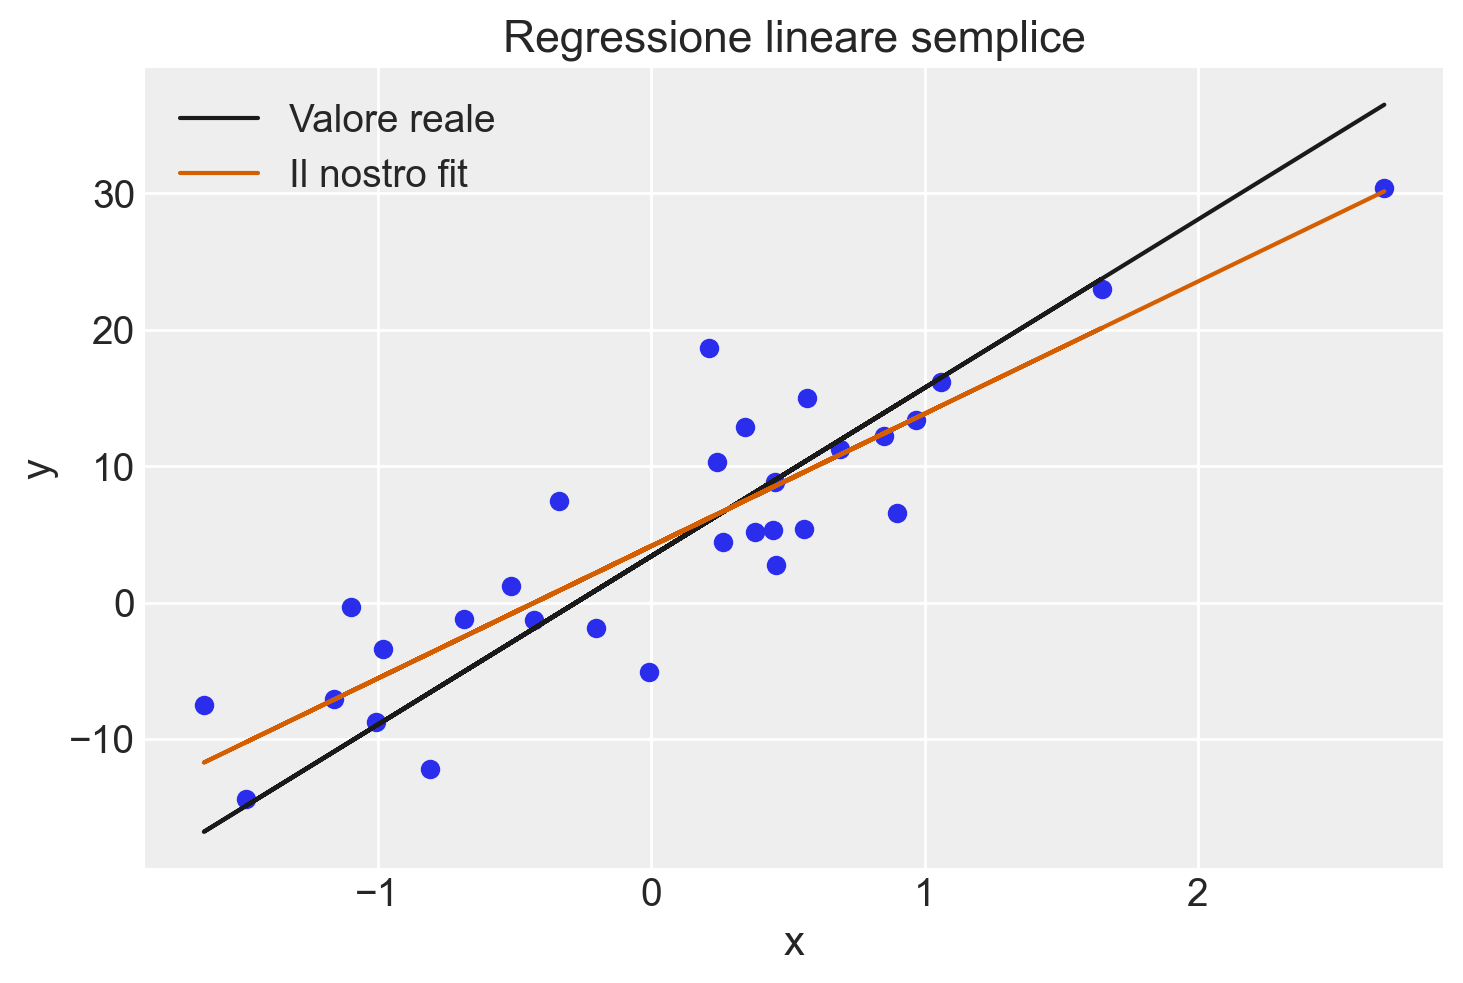

In [5]:
# Simulazione di una regressione lineare semplice

# Scegli valori casuali per b_0 e b_1 
b = np.array([3.4, 12.35])  # pendenza e intercetta
b = b[:, np.newaxis]

# Simula n punti dati. x è distribuito normalmente
n = 30
data_mean = 0
data_std = 1
data = np.random.normal(
    data_mean, data_std, size=(n, 1)
)  # rendi l'array 2D per semplificare

# Poiché abbiamo b_0 nel nostro vettore dei pesi, aggiungiamo una colonna di 1s alla nostra matrice di dati
ones = np.ones((n, 1))
x = np.hstack((ones, data))  # x è la nostra matrice di design

# Aggiungi rumore gaussiano
noise_loc = 0
noise_scale = 5
e = np.random.normal(loc=noise_loc, scale=noise_scale, size=(n, 1))

# Simula i valori di y
y = x.dot(b) + e

# Calcola le stime per b, le predizioni
b_hat = np.linalg.inv(x.T @ x) @ x.T @ y
y_hat = x.dot(b_hat)

# Calcola R^2
SS_res = e.T @ e
std = y - y.mean()
SS_tot = std.T @ std
r2 = 1 - (SS_res / SS_tot)

# Grafico dei dati
fig, ax = plt.subplots()
ax.scatter(data, y)  # Tracciamento dei dati
ax.set(xlabel="x", ylabel="y", title="Regressione lineare semplice")

# Traccia la linea vera
b_0, b_1 = b
ax.plot(data, b_0 + (b_1 * data), color="k", label="Valore reale")

# Traccia il nostro fit
ax.plot(data, y_hat, color="r", label="Il nostro fit")
ax.legend()

print("Valori veri di b:\n", b)
print("La nostra stima:\n", b_hat)
print("R^2:", r2)